<a href="https://colab.research.google.com/github/PavelMakhanov/pet-project/blob/streamlit/%D0%92%D0%B5%D0%B1%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B0_streamlit_%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D1%82%D0%BE%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8_%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Итоговое веб-приложение доступно по ссылке https://pavelmakhanov-pet-project-streamlit-app-streamlit-zu2ngh.streamlit.app/

#Предобработка данных

## [Датасет](https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021?resource=download) из Kagle.

Датасет состоит из списков уникальных объектов популярных порталов по продаже недвижимости. 
Набор данных состоит из 13 полей:

date — дата публикации объявления

time – время публикации

geo_lon — широта

geo_lat — долгота

region — регион

building_type — 0 — Другой. 1 — Панельный. 2 — Монолитный. 3 — Кирпичный. 4 — Блочный. 5 — Деревянный

object_type — Тип квартиры. 1 — Вторичный рынок недвижимости; 2 — Новостройка;

level — этаж квартиры

levels — количество этажей в доме

rooms — количество жилых комнат. Если значение равно «-1», то это означает «однокомнатная квартира»

area — общая площадь квартиры

kitchen_area — площадь кухни

price — цена в рублях

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv('all_v2.csv')

In [ ]:
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


Ограничим наш датасет только одним городом - Санкт-Петербург

In [ ]:
df = df[df['region'] == 2661]

Извлечем дату и месяц из признака date

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [ ]:
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1,2018,2
7,3600000,2018-03-04,20:52:38,59.875526,30.395457,2661,1,2,5,1,31.1,6.0,1,2018,3
36,3200000,2018-04-10,16:10:12,59.827465,30.201827,2661,1,7,9,1,31.0,7.0,1,2018,4
47,6500000,2018-04-23,11:47:58,59.988334,29.786928,2661,3,3,3,3,89.0,10.0,1,2018,4
54,6300000,2018-04-28,17:47:24,59.911622,30.284556,2661,3,5,5,2,99.9,14.5,1,2018,4


Удалим ненужные колонки

In [ ]:
df.drop(['date','time','region'], axis = 1, inplace= True)

Посмотрим основные статистики

In [ ]:
df.describe()

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
count,4.618200e+05,461820.000000,461820.000000,461820.000000,461820.000000,461820.000000,461820.000000,461820.000000,461820.000000,461820.000000,461820.000000,461820.000000
mean,8.209775e+06,59.932848,30.319601,1.948281,7.582619,14.336625,1.778953,58.582237,12.749967,5.271231,2019.545306,6.539385
std,1.416036e+07,0.084615,0.120120,0.954559,5.694418,7.073714,1.124851,42.138205,7.641011,4.946610,0.856485,3.433894
min,-1.719935e+09,59.647383,29.509349,0.000000,1.000000,1.000000,-2.000000,1.400000,0.020000,1.000000,2018.000000,1.000000
25%,4.400000e+06,59.863518,30.256876,1.000000,3.000000,9.000000,1.000000,37.600000,8.500000,1.000000,2019.000000,3.000000
50%,5.950000e+06,59.939084,30.324338,2.000000,6.000000,13.000000,2.000000,51.000000,11.100000,1.000000,2020.000000,7.000000
75%,8.800000e+06,59.999287,30.397938,3.000000,11.000000,20.000000,2.000000,69.000000,15.150000,11.000000,2020.000000,10.000000
max,1.945383e+09,60.241984,30.711428,5.000000,35.000000,38.000000,9.000000,7856.000000,1272.000000,11.000000,2021.000000,12.000000


Обработаем отрицательные значения 

In [ ]:
df['price'] = df['price'].abs()

In [ ]:
df['rooms'] = df['rooms'].abs()

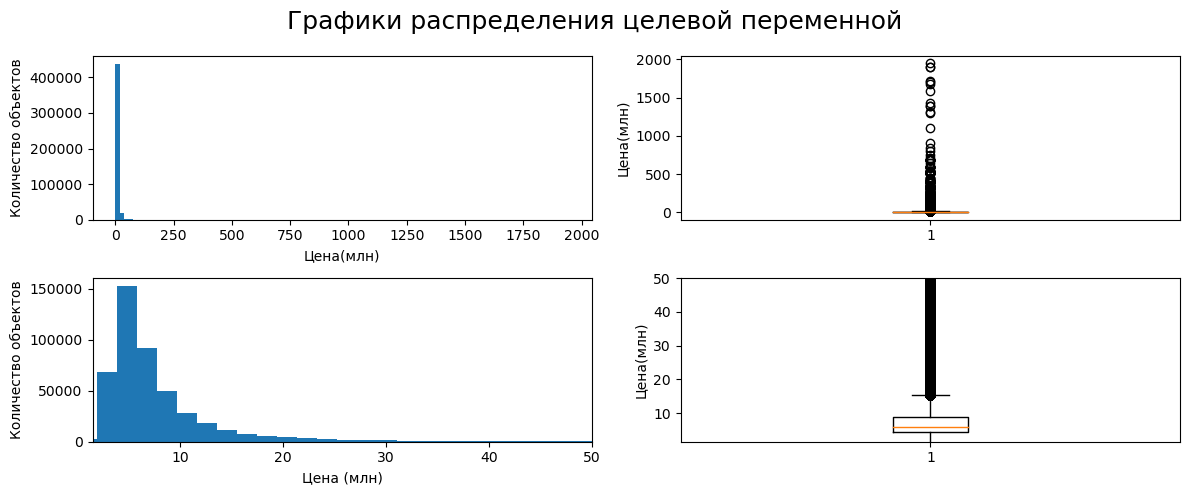

In [ ]:
mode_price = int(df['price'].mode()[0])

fig, axs = plt.subplots(2,2, figsize=(12,5), dpi = 100)
fig.suptitle('Графики распределения целевой переменной', fontsize=18)
axs[0,0].hist((df['price']/1000000),bins = 100)
axs[0,0].set_xlabel('Цена(млн)')
axs[0,0].set_ylabel('Количество объектов')
axs[0,1].boxplot((df['price']/1000000))
axs[0,1].set_ylabel('Цена(млн)')

axs[1,0].hist((df['price']/1000000),bins = 1000)
axs[1,0].set_xlim(1.5,50)
axs[1,0].set_xlabel('Цена (млн)')
axs[1,0].set_ylabel('Количество объектов')
axs[1,1].boxplot((df['price']/1000000))
axs[1,1].set_ylabel('Цена(млн)')
axs[1,1].set_ylim(1.5,50)

fig.tight_layout()
plt.show()

Ограничим цену недвижимости 1,5 до 50 млн, так как на данном промежутке цена распределена более нормально. Так же таким образом мы избавимся от выбросов и сохраним достаточное количество данным для обучения

In [ ]:
df = df.loc[(df['price']>= 1500000)&(df['price']<=50000000)]

Так как данных достаточно много, то просто уберем аномальные значения в других колонках

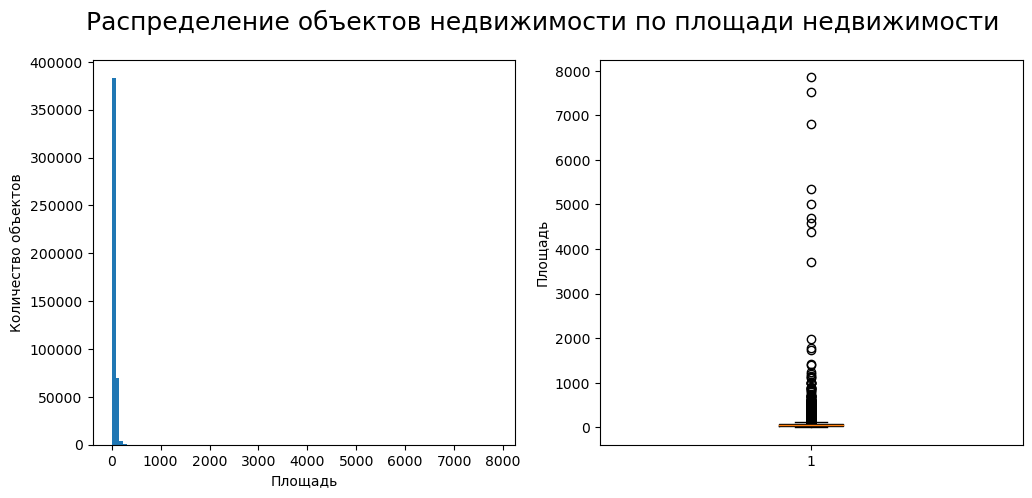

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5), dpi = 100)
fig.suptitle('Распределение объектов недвижимости по площади недвижимости', fontsize=18)
axs[0].hist(df['area'], bins = 100)
axs[0].set_xlabel('Площадь')
axs[0].set_ylabel('Количество объектов')
axs[1].boxplot(df['area'])
axs[1].set_ylabel('Площадь')
plt.show()

In [ ]:
df = df[(df['area'] <=200) & (df['area'] >= 20)]

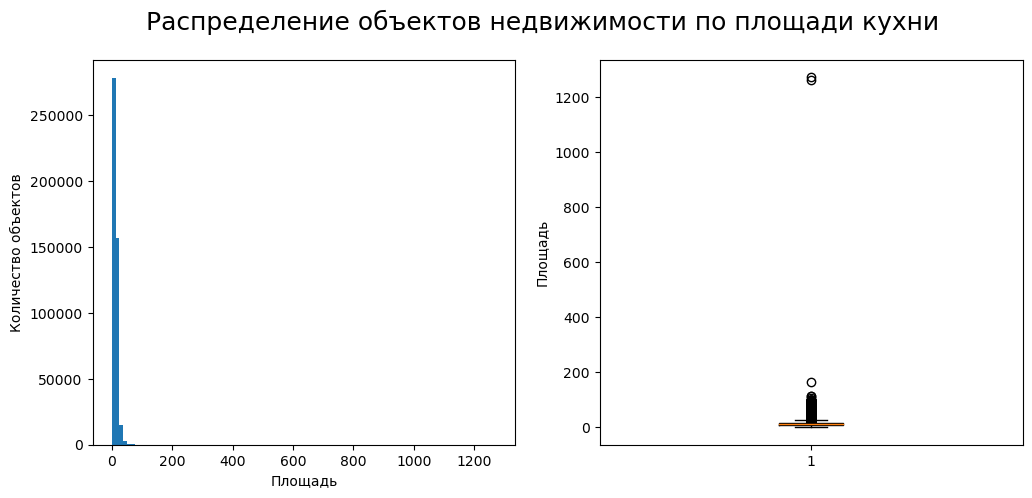

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5), dpi = 100)
fig.suptitle('Распределение объектов недвижимости по площади кухни', fontsize=18)
axs[0].hist(df['kitchen_area'], bins = 100)
axs[0].set_xlabel('Площадь')
axs[0].set_ylabel('Количество объектов')
axs[1].boxplot(df['kitchen_area'])
axs[1].set_ylabel('Площадь')
plt.show()

In [ ]:
df = df[(df['kitchen_area'] <=30) & (df['kitchen_area'] >= 6)]

In [ ]:
df.describe()

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
count,4.106630e+05,410663.000000,410663.000000,410663.000000,410663.000000,410663.000000,410663.000000,410663.000000,410663.000000,410663.000000,410663.000000,410663.000000
mean,7.595275e+06,59.933733,30.321789,1.933408,7.724516,14.653879,1.876595,57.528256,12.565677,5.371687,2019.539688,6.538517
std,5.075850e+06,0.084681,0.118446,0.950184,5.717459,6.967540,0.902790,24.991515,4.722221,4.960371,0.854656,3.433490
min,1.500000e+06,59.647383,29.509349,0.000000,1.000000,1.000000,1.000000,20.000000,6.000000,1.000000,2018.000000,1.000000
25%,4.590000e+06,59.863938,30.256876,1.000000,3.000000,9.000000,1.000000,38.600000,9.100000,1.000000,2019.000000,3.000000
50%,6.065766e+06,59.939084,30.324465,2.000000,6.000000,14.000000,2.000000,52.000000,11.500000,1.000000,2020.000000,7.000000
75%,8.745887e+06,60.002036,30.401117,3.000000,11.000000,21.000000,2.000000,68.400000,15.100000,11.000000,2020.000000,10.000000
max,5.000000e+07,60.241984,30.711428,5.000000,35.000000,38.000000,9.000000,200.000000,30.000000,11.000000,2021.000000,12.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410663 entries, 0 to 5476998
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          410663 non-null  int64  
 1   geo_lat        410663 non-null  float64
 2   geo_lon        410663 non-null  float64
 3   building_type  410663 non-null  int64  
 4   level          410663 non-null  int64  
 5   levels         410663 non-null  int64  
 6   rooms          410663 non-null  int64  
 7   area           410663 non-null  float64
 8   kitchen_area   410663 non-null  float64
 9   object_type    410663 non-null  int64  
 10  year           410663 non-null  int64  
 11  month          410663 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 40.7 MB


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
price,1.000000,0.059786,-0.069051,0.076815,-0.076799,-0.177535,0.526570,0.780188,0.490240,-0.021540,0.140066,-0.029486
geo_lat,0.059786,1.000000,-0.159221,-0.046907,0.136593,0.221732,-0.007318,0.015375,0.045395,0.083565,0.019443,-0.001410
geo_lon,-0.069051,-0.159221,1.000000,-0.074471,0.054264,0.086318,-0.012542,-0.062546,-0.072554,0.017450,0.002260,-0.008397
building_type,0.076815,-0.046907,-0.074471,1.000000,-0.071511,-0.128030,0.060672,0.092747,0.042632,-0.028957,-0.044320,0.060428
level,-0.076799,0.136593,0.054264,-0.071511,1.000000,0.599788,-0.135679,-0.095176,0.049603,0.145445,0.015021,-0.003034
levels,-0.177535,0.221732,0.086318,-0.128030,0.599788,1.000000,-0.227345,-0.170713,0.105279,0.289556,0.020559,-0.012881
rooms,0.526570,-0.007318,-0.012542,0.060672,-0.135679,-0.227345,1.000000,0.802097,0.191556,-0.134170,-0.008151,-0.005802
area,0.780188,0.015375,-0.062546,0.092747,-0.095176,-0.170713,0.802097,1.000000,0.461660,-0.082827,-0.030105,0.003026
kitchen_area,0.490240,0.045395,-0.072554,0.042632,0.049603,0.105279,0.191556,0.461660,1.000000,0.295131,0.033858,0.002598
object_type,-0.021540,0.083565,0.017450,-0.028957,0.145445,0.289556,-0.134170,-0.082827,0.295131,1.000000,0.100578,-0.028066


Данные обработаны, пропущенных значений нет, мультиколлинеарность отсутствует

##Парсинг данных

Так как данные у нас немного устаревшие, добавим новые данные

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import random
import time
import re

In [ ]:
# HEADERS = {'User-Agent': 
#            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,\
#             like Gecko) Chrome/108.0.0.0 YaBrowser/23.1.2.928 Yowser/2.5 Safari/537.36'}

In [ ]:
# estate = pd.DataFrame()

In [ ]:
# count = 1
# for i in range(1,100):

#   try:
#       time.sleep(random.randint(1, 4))

#       url_page = 'https://tvoyadres.ru/leningradskaya-oblast/sankt-peterburg/nedvizhimost/kvartiry/?page='+str(i)+'&region=77&city=842&object=2&'
#       res = requests.get(url_page, headers=HEADERS, timeout = 3)
#       soup = BeautifulSoup(res.text)

#       refs_page = refs_page = soup2.findAll('a')

#       links_page = []

#       for ref in refs_page:
#           st = re.search('\S+\d{8}',ref.get('href'))
#           if st:
#             links_page.append('https://tvoyadres.ru'+st[0])
          
#       for link in links_page:
#         try:
          
#           time.sleep(random.randint(2, 5)) 
#           res_link = requests.get(link, headers=HEADERS, timeout = 3)
#           soup_link = BeautifulSoup(res_link.text)
#           dic = {}

#           price = int(soup_link.find(itemprop = 'price').get('content'))
#           geo_lat = float(soup_link.find(class_ = 'map small').get('data-coordinates').split(',')[0])
#           geo_lon = float(soup_link.find(class_ = 'map small').get('data-coordinates').split(',')[1])
#           building_type = soup_link.find(text = ['Панельный','Монолитный','Кирпичный','Блочный','Деревянный'])
          
#           for i,j in zip(soup_link.findAll(class_ = 'left'),soup_link.findAll(class_ = 'right')):
#               dic[i.text] = j.text
          
#           level = int(dic['Этаж'].split('/')[0])
#           levels = int(dic['Этаж'].split('/')[1])
#           try:
#               rooms = int(dic['Количество комнат'])
#           except:
#               rooms = 1   
#           area = int(dic['Площадь объекта'].split('/')[0])
#           try:
#               kitchen_area = int(dic['Площадь объекта'].split('/')[2].replace('м²',''))
#           except:
#               kitchen_area = int(dic['Площадь объекта'].split('/')[0])-int(dic['Площадь объекта'].split('/')[1].replace('м²','')) 
#           object_type = dic['Тип жилья'] 
#           date = dic['Дата публикации'].strip()

#           row = {'price': price, 'geo_lat': geo_lat, 'geo_lon':geo_lon, 'building_type': building_type,
#                  'level':level,'levels': levels, 'rooms': rooms, 'area': area,
#                  'kitchen_area': kitchen_area, 'object_type': object_type, 'date': date}
#           estate = pd.concat([estate, pd.DataFrame([row])])


#         except:
#            pass
#       count+=1
#       print(f'номер цикла: {count}, длина датафрейма: {len(estate)}')  

#   except:
#       pass

In [ ]:
# estate.to_csv('estate.csv',index=False)

In [ ]:
# pd.set_option('display.max_colwidth', None)

Приведем данные в нужный нам вид и обработаем пропуски

In [ ]:
estate = pd.read_csv('estate.csv')

In [ ]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          994 non-null    int64  
 1   geo_lat        994 non-null    float64
 2   geo_lon        994 non-null    float64
 3   building_type  994 non-null    object 
 4   level          994 non-null    int64  
 5   levels         994 non-null    int64  
 6   rooms          994 non-null    int64  
 7   area           994 non-null    float64
 8   kitchen_area   994 non-null    float64
 9   object_type    994 non-null    object 
 10  date           994 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 85.5+ KB


In [ ]:
estate['building_type'] = estate['building_type'].fillna('Другой')

In [ ]:
estate['building_type'].unique()

array(['Другой', 'Монолитный', 'Кирпичный'], dtype=object)

In [ ]:
estate['building_type'] = estate['building_type'].replace({'Другой':0,'Монолитный':2,'Кирпичный':3 })

In [ ]:
estate['rooms'] = estate['rooms'].replace('Студия',1)

In [ ]:
estate['rooms'] = estate['rooms'].apply(lambda x: int(x))

In [ ]:
estate['object_type'] = estate['object_type'].replace({'Вторичка':1, 'Новостройка':11})

In [ ]:
estate['object_type'].unique()

array([ 1, 11], dtype=int64)

In [ ]:
estate['year'] = estate['date'].apply(lambda x: x.split()[2])

In [ ]:
estate['year'] = estate['year'].apply(lambda x: int(x))

In [ ]:
estate['month'] = estate['date'].apply(lambda x: x.split()[1])

In [ ]:
estate['month'].unique()

array(['Март'], dtype=object)

In [ ]:
estate['month'] = estate['month'].replace('Март',3)

In [ ]:
estate = estate[['price', 'geo_lat', 'geo_lon', 'building_type', 'level', 'levels',
       'rooms', 'area', 'kitchen_area', 'object_type', 'year',
       'month']]

In [ ]:
estate.head()

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
0,7250000,60.004708,30.207702,0,20,25,1,35.0,10.0,1,2023,3
1,14059980,60.031801,30.208547,2,12,12,1,47.0,34.0,11,2023,3
2,8688437,59.895842,30.465804,3,14,15,2,51.0,13.0,11,2023,3
3,14095620,60.031801,30.208547,2,12,12,1,47.0,34.0,11,2023,3
4,13217600,59.898002,30.285433,3,1,6,2,60.0,16.0,11,2023,3


In [ ]:
estate.describe()

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
count,9.940000e+02,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.0,994.0
mean,1.577750e+07,60.006848,30.149278,2.001006,8.611670,11.804829,1.699195,55.870221,21.290744,9.993964,2023.0,3.0
std,6.489160e+06,0.108523,0.253082,1.097006,5.530116,5.359779,0.640257,13.516700,9.522802,3.009546,0.0,0.0
min,7.250000e+06,59.895842,29.662643,0.000000,1.000000,6.000000,1.000000,35.000000,10.000000,1.000000,2023.0,3.0
25%,1.321760e+07,59.898002,30.207702,2.000000,4.000000,6.000000,1.000000,47.000000,13.000000,11.000000,2023.0,3.0
50%,1.405998e+07,60.004708,30.208547,2.000000,7.000000,12.000000,2.000000,51.000000,16.000000,11.000000,2023.0,3.0
75%,1.922850e+07,60.031801,30.285433,3.000000,12.000000,12.000000,2.000000,60.000000,32.000000,11.000000,2023.0,3.0
max,2.998790e+07,60.191738,30.465804,3.000000,20.000000,25.000000,3.000000,85.000000,34.000000,11.000000,2023.0,3.0


In [ ]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          994 non-null    int64  
 1   geo_lat        994 non-null    float64
 2   geo_lon        994 non-null    float64
 3   building_type  994 non-null    int64  
 4   level          994 non-null    int64  
 5   levels         994 non-null    int64  
 6   rooms          994 non-null    int64  
 7   area           994 non-null    float64
 8   kitchen_area   994 non-null    float64
 9   object_type    994 non-null    int64  
 10  year           994 non-null    int64  
 11  month          994 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 93.3 KB


##Объединяем данные 

In [ ]:
all_estate = pd.concat([df,estate], ignore_index=True)

In [ ]:
all_estate.head()

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
0,6050000,59.805808,30.376141,1,8,10,3,82.6,10.8,1,2018,2
1,3600000,59.875526,30.395457,1,2,5,1,31.1,6.0,1,2018,3
2,3200000,59.827465,30.201827,1,7,9,1,31.0,7.0,1,2018,4
3,6500000,59.988334,29.786928,3,3,3,3,89.0,10.0,1,2018,4
4,6300000,59.911622,30.284556,3,5,5,2,99.9,14.5,1,2018,4


In [ ]:
all_estate.describe()

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
count,4.116570e+05,411657.000000,411657.000000,411657.000000,411657.000000,411657.000000,411657.000000,411657.000000,411657.000000,411657.000000,411657.000000,411657.000000
mean,7.615032e+06,59.933909,30.321373,1.933571,7.726658,14.647000,1.876166,57.524252,12.586745,5.382848,2019.548044,6.529973
std,5.095575e+06,0.084822,0.119255,0.950570,5.717173,6.965504,0.902290,24.970283,4.758954,4.961772,0.870354,3.433737
min,1.500000e+06,59.647383,29.509349,0.000000,1.000000,1.000000,1.000000,20.000000,6.000000,1.000000,2018.000000,1.000000
25%,4.592608e+06,59.864023,30.256876,1.000000,3.000000,9.000000,1.000000,38.600000,9.100000,1.000000,2019.000000,3.000000
50%,6.086251e+06,59.939084,30.324456,2.000000,6.000000,14.000000,2.000000,52.000000,11.500000,1.000000,2020.000000,7.000000
75%,8.763370e+06,60.002180,30.401117,3.000000,11.000000,21.000000,2.000000,68.400000,15.100000,11.000000,2020.000000,10.000000
max,5.000000e+07,60.241984,30.711428,5.000000,35.000000,38.000000,9.000000,200.000000,34.000000,11.000000,2023.000000,12.000000


In [ ]:
all_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411657 entries, 0 to 411656
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          411657 non-null  int64  
 1   geo_lat        411657 non-null  float64
 2   geo_lon        411657 non-null  float64
 3   building_type  411657 non-null  int64  
 4   level          411657 non-null  int64  
 5   levels         411657 non-null  int64  
 6   rooms          411657 non-null  int64  
 7   area           411657 non-null  float64
 8   kitchen_area   411657 non-null  float64
 9   object_type    411657 non-null  int64  
 10  year           411657 non-null  int64  
 11  month          411657 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 37.7 MB


In [ ]:
all_estate.to_csv('all_estate.csv',index=False)

#Обучение модели

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import cross_val_score

**Разделим датасет на обучающую и тестовую выборку**

In [ ]:
all_estate = pd.read_csv('all_estate.csv')

In [ ]:
y = all_estate['price']

In [ ]:
X = all_estate.drop('price', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 1)

**Построение модели машинного обучения**

Для построения модели предсказания цены на квартиру будем использовать продвинутые методы машинного обучения, а именно — градиентный бустинг. Данный тип алгоритмов является крайне эффективным в задачах классификации или регрессии: он строит предсказания в виде ансамбля слабых деревьев решения, а затем слабые деревья собираются в одну сильную модель.
В данном случае будем использовать XGBoost.

In [ ]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBRegressor(random_state = 1)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [ ]:
predictions = model_xgb.predict(X_test)

In [ ]:
print(f'R^2 score: {r2_score(y_test, predictions):.3f}')
print(f'RMSE score: {mean_squared_error(y_test, predictions, squared=False):.2f}')

R^2 score: 0.889
RMSE score: 1704117.44


Даже без оптимизации гиперпараметров, модель дает хороший результат. Следующим шагом оптимизируем некоторые гиперпараметры модели.

**Оптимизируем гиперпараметры**

In [ ]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import optuna

In [ ]:
def objective(trial):
    params = {
        'eta': trial.suggest_categorical('eta', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),  
        'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6, 7]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 50),
        'gamma': trial.suggest_categorical('gamma', [18, 19, 20, 21, 22, 23, 24, 25]),
        'random_state': 1
    }

    model = xgb.XGBRegressor(**params)  
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return r2_score(y_test, predictions)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


[I 2023-03-14 20:27:11,597] A new study created in memory with name: no-name-a8d8fa9b-f466-46e4-af49-24a41c4e0419
[I 2023-03-14 20:33:35,824] Trial 0 finished with value: 0.9145000467552897 and parameters: {'eta': 0.5, 'n_estimators': 832, 'max_depth': 6, 'min_child_weight': 49, 'gamma': 23}. Best is trial 0 with value: 0.9145000467552897.
[I 2023-03-14 20:35:35,596] Trial 1 finished with value: 0.8834523885129387 and parameters: {'eta': 0.7, 'n_estimators': 577, 'max_depth': 3, 'min_child_weight': 36, 'gamma': 18}. Best is trial 0 with value: 0.9145000467552897.
[I 2023-03-14 20:39:37,757] Trial 2 finished with value: 0.9009691531639409 and parameters: {'eta': 0.5, 'n_estimators': 732, 'max_depth': 4, 'min_child_weight': 11, 'gamma': 20}. Best is trial 0 with value: 0.9145000467552897.
[I 2023-03-14 20:43:36,690] Trial 3 finished with value: 0.8943607949312282 and parameters: {'eta': 1.0, 'n_estimators': 640, 'max_depth': 5, 'min_child_weight': 15, 'gamma': 19}. Best is trial 0 with v

In [ ]:
print(f'Best value: {study.best_trial.value}')
print(f'Best params: {study.best_trial.params}')

Best value: 0.9222361247205845
Best params: {'eta': 0.3, 'n_estimators': 777, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 21}


**Обучение модели с оптимизированными гиперпараметрами**

In [ ]:
model_xgb = xgb.XGBRegressor(random_state = 1, eta = 0.3, n_estimators = 777, max_depth = 7,
                             min_child_weight = 7, gamma = 21)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=21, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=7, missing=nan,
             monotone_constraints=None, n_estimators=777, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
predictions = model_xgb.predict(X_test)

In [ ]:
print(f'R^2 score: {r2_score(y_test, predictions):.3f}')
print(f'RMSE score: {mean_squared_error(y_test, predictions, squared=False):.2f}')

R^2 score: 0.922
RMSE score: 1427693.82


In [ ]:
cv_scores = cross_val_score(model_xgb, X, y, cv=10,scoring='r2')

In [ ]:
print(f'cross_val_score R2: {cv_scores}',f'cross_val_score R2 mean: {cv_scores.mean()}', sep = '\n')

cross_val_score R2: [0.76754208 0.88332279 0.89982332 0.90922912 0.92114924 0.94012002
 0.92464811 0.8983894  0.87747587 0.81748271]
cross_val_score R2 mean: 0.8839182658936302


**Сохраняем обученную модель**

In [ ]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import joblib

In [ ]:
joblib_file = "model_xgb.pkl" 
joblib.dump(model_xgb, joblib_file)

['model_xgb.pkl']

In [ ]:
model = joblib.load("model_xgb.pkl")

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(f'R^2 score: {r2_score(y_test, predictions):.3f}')
print(f'RMSE score: {mean_squared_error(y_test, predictions, squared=False):.2f}')

R^2 score: 0.922
RMSE score: 1427693.82


**Обучение нейросети**

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state = 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

In [ ]:
model = Sequential([
    Dense(32,activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1,activation='linear')
])

In [ ]:
model.compile(optimizer= 'Adam',
              loss='mse',
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [ ]:
model.fit(X_train,
          y_train, 
          epochs=50,
          batch_size = 32)

Epoch 1/50
10292/10292 [==============================] - 25s 2ms/step - loss: 15719204913152.0000 - rmse: 3964745.2500
Epoch 2/50
10292/10292 [==============================] - 27s 3ms/step - loss: 11020330336256.0000 - rmse: 3319688.2500
Epoch 3/50
10292/10292 [==============================] - 26s 3ms/step - loss: 10913676525568.0000 - rmse: 3303585.5000
Epoch 4/50
10292/10292 [==============================] - 25s 2ms/step - loss: 10846180737024.0000 - rmse: 3293354.0000
Epoch 5/50
10292/10292 [==============================] - 26s 3ms/step - loss: 10824872624128.0000 - rmse: 3290117.5000
Epoch 6/50
10292/10292 [==============================] - 26s 3ms/step - loss: 10725919555584.0000 - rmse: 3275045.0000
Epoch 7/50
10292/10292 [==============================] - 40s 4ms/step - loss: 10622949392384.0000 - rmse: 3259286.7500
Epoch 8/50
10292/10292 [==============================] - 26s 2ms/step - loss: 10623547080704.0000 - rmse: 3259378.2500
Epoch 9/50
10292/10292 [================

In [ ]:
predictionsNN = model.predict(X_test)

2573/2573 [==============================] - 4s 1ms/step


In [ ]:
print(f'R^2 score: {r2_score(y_test, predictionsNN):.3f}')
print(f'RMSE score: {mean_squared_error(y_test, predictionsNN, squared=False):.2f}')

R^2 score: 0.731
RMSE score: 2656792.77


Так как модель xgboost показывает лучшие метрики по сравнению с нейросетью, в веб-приложении будем использовать модель xgboost.

#Приложение streamlit

In [1]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [2]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%%writefile streamlit_app.py
import joblib
import datetime
import streamlit as st
from geopy.geocoders import Nominatim
import numpy as np


st.title('Рассчитайте стоимость недвижимости')
st.image('interer.jpeg')

st.sidebar.title('Заполните параметры')

adress = st.sidebar.text_input('Введите адрес.   Пример: Санкт-Петербург Фрунзе 25')

building_type = st.sidebar.selectbox('Выберите тип здания', ['Монолитный','Кирпичный','Другой'])

level = st.sidebar.slider('Этаж',min_value=1, max_value=50)

levels = st.sidebar.slider('Всего этажей',min_value=1, max_value=50)

rooms = st.sidebar.selectbox('Количество комнат', [1,2,3,4,5])

area = st.sidebar.slider('Площадь',min_value=1, max_value=100)

kitchen_area = st.sidebar.slider('Площадь кухни',min_value=1, max_value=50)

object_type = st.sidebar.selectbox('Тип жилья', ['Новостройка','Вторичка'])

date = datetime.datetime.now()

month = date.month

year = date.year

geolocator = Nominatim(user_agent="my_request")
location = geolocator.geocode(adress)

if building_type == 'Монолитный':
  building_type = 2
elif building_type == 'Кирпичный':
  building_type = 3
else:
  building_type = 0

if object_type == 'Новостройка':
  object_type = 11
else:
  object_type = 1  

model = joblib.load("model_xgb.pkl")
  

if st.sidebar.button('Рассчитать стоимость'):
    geo_lat = location.latitude 
    geo_lon = location.longitude
    prediction_inp = np.array([geo_lat,geo_lon,building_type,level,levels,\
                 rooms,area,kitchen_area,object_type,month,year])
    cost = model.predict(prediction_inp.reshape(1, -1))
    cost = '{0:,}'.format(int(cost)).replace(',', ' ')

    st.write(f'### Приблизительная cтоимость жилья:\n ## {cost}')


Writing streamlit_app.py


In [4]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.308s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [5]:
!streamlit run /content/streamlit_app.py &>/content/logs.txt &

In [6]:
!npx localtunnel --port 8501

npx: installed 22 in 2.679s
your url is: https://cuddly-rockets-sin-34-147-12-162.loca.lt
^C
